In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('international-airline-passengers.csv',parse_dates=["Month"],index_col="Month")

In [21]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


<AxesSubplot:xlabel='Month'>

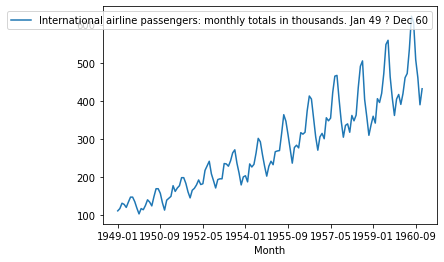

In [22]:
df.plot()

In [23]:
df.shape

(145, 1)

In [25]:
size=int(df.shape[0]*0.8)

In [26]:
train=df.iloc[:size]
train.shape
test=df.iloc[size:]
test.shape

(29, 1)

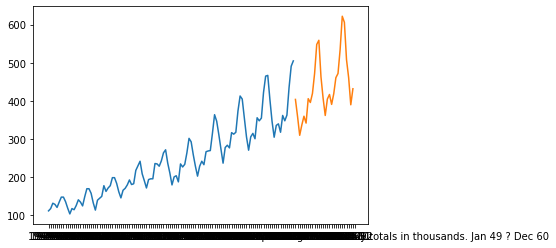

In [27]:
plt.plot(train)
plt.plot(test)

In [28]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
mx.fit(train)
sc_train=mx.transform(train)
sc_test=mx.transform(test)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu',input_shape=(10,1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=1)

In [31]:
lstm_model.fit_generator(gen,epochs=20)


C:\Users\tejas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
106/106 [==============================] - 5s 8ms/step - loss: 0.0566
Epoch 2/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0108
Epoch 3/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0184
Epoch 4/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0159
Epoch 5/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0144
Epoch 6/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0128
Epoch 7/20
106/106 [==============================] - 1s 11ms/step - loss: 0.0159
Epoch 8/20
106/106 [==============================] - 1s 11ms/step - loss: 0.0124
Epoch 9/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0117
Epoch 10/20
106/106 [==============================] - 1s 8ms/step - loss: 0.0097
Epoch 11/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 12/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0074
Epoch 13/20
106/106 [==

([<matplotlib.axis.XTick at 0x1b7c7080c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

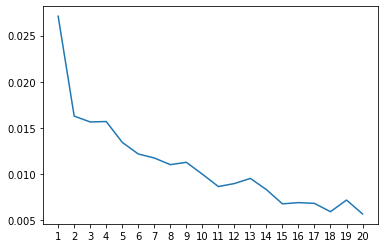

In [32]:
loss=lstm_model.history.history["loss"]
plt.plot(range(1,len(loss)+1),loss)
plt.xticks(range(1,len(loss)+1))

In [33]:
pred = []

batch = sc_train[-10:]
current_batch = batch.reshape((1, 10, 1))

for i in range(len(test)):   
    tpred = lstm_model.predict(current_batch)[0]
    pred.append(tpred) 
    current_batch = np.append(current_batch[:,1:,:],[[tpred]],axis=1)
  

In [34]:
pred

[array([0.8728551], dtype=float32),
 array([0.79417634], dtype=float32),
 array([0.72842824], dtype=float32),
 array([0.67556745], dtype=float32),
 array([0.70271456], dtype=float32),
 array([0.73009276], dtype=float32),
 array([0.8116258], dtype=float32),
 array([0.94726825], dtype=float32),
 array([1.1176082], dtype=float32),
 array([1.2705353], dtype=float32),
 array([1.2823306], dtype=float32),
 array([1.1989561], dtype=float32),
 array([1.0622859], dtype=float32),
 array([0.924244], dtype=float32),
 array([0.85706556], dtype=float32),
 array([0.86575705], dtype=float32),
 array([0.9672371], dtype=float32),
 array([1.1524315], dtype=float32),
 array([1.4224936], dtype=float32),
 array([1.7673081], dtype=float32),
 array([2.043714], dtype=float32),
 array([2.1301818], dtype=float32),
 array([1.9437575], dtype=float32),
 array([1.5678909], dtype=float32),
 array([1.2189342], dtype=float32),
 array([1.0660572], dtype=float32),
 array([1.1893158], dtype=float32),
 array([1.5639548], dt

In [35]:
lstm_predictions = mx.inverse_transform(pred)
lstm_predictions

array([[ 454.01490587],
       [ 422.46471238],
       [ 396.09972608],
       [ 374.9025467 ],
       [ 385.78853953],
       [ 396.76719832],
       [ 429.46193725],
       [ 483.85456729],
       [ 552.16088402],
       [ 613.48467529],
       [ 618.21458352],
       [ 584.78140891],
       [ 529.97664595],
       [ 474.62183863],
       [ 447.68328893],
       [ 451.1685763 ],
       [ 491.86208308],
       [ 566.1250267 ],
       [ 674.41992438],
       [ 812.6905545 ],
       [ 923.52933264],
       [ 958.20289755],
       [ 883.44677114],
       [ 732.72424388],
       [ 592.79260552],
       [ 531.48893929],
       [ 580.91563416],
       [ 731.1458869 ],
       [1007.51553464]])

In [36]:
test_df=test
test_df['LSTM_Predictions'] = lstm_predictions
test_df.head()

<ipython-input-36-c1ea56a3f8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['LSTM_Predictions'] = lstm_predictions


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,LSTM_Predictions
Month,,
1958-09,404.0,454.014906
1958-10,359.0,422.464712
1958-11,310.0,396.099726
1958-12,337.0,374.902547
1959-01,360.0,385.788540


<AxesSubplot:xlabel='Month'>

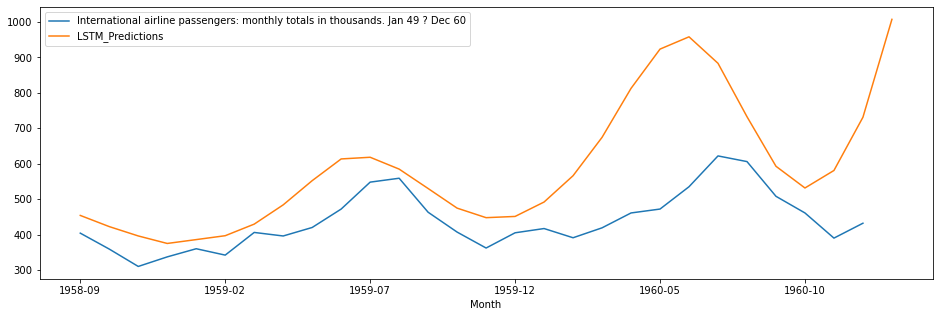

In [37]:
test_df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot(figsize = (16,5), legend=True)
test_df['LSTM_Predictions'].plot(legend = True)